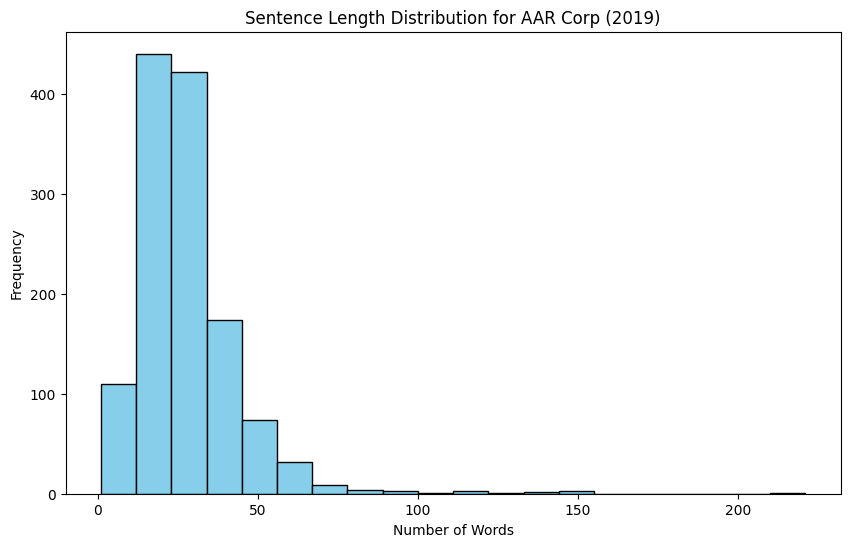

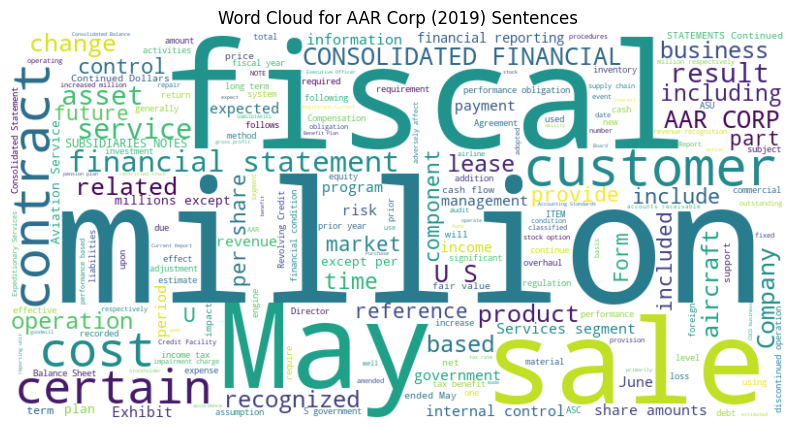

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from dotenv import load_dotenv
from os.path import join, dirname
from data_preprocessor import DataPreprocessor
from langchain_community.document_loaders import DataFrameLoader
from transformers import pipeline
import pandas as pd
from datasets import load_dataset
from tqdm import tqdm

# Load environment variables (optional)
# dotenv_path = join(dirname(__file__), '.env')
# load_dotenv(dotenv_path)

class DataVisualization:
    def __init__(self, filtered_data):
        if isinstance(filtered_data, pd.DataFrame):
            self.filtered_data = filtered_data
        else:
            raise ValueError("Expected a pandas DataFrame for filtered_data")

    def visualize(self):
        sentences = self.filtered_data['sentence']
        
        # 1. Sentence Length Distribution
        sentence_lengths = sentences.apply(lambda x: len(x.split()))
        plt.figure(figsize=(10, 6))
        plt.hist(sentence_lengths, bins=20, color='skyblue', edgecolor='black')
        plt.title('Sentence Length Distribution for AAR Corp (2019)')
        plt.xlabel('Number of Words')
        plt.ylabel('Frequency')
        plt.show()

        # 2. Sentiment Distribution (for 1-day, 5-day, 30-day sentiment)
        sentiment_columns = ['1_day_sentiment', '5_day_sentiment', '30_day_sentiment']
        for sentiment in sentiment_columns:
            if sentiment in self.filtered_data.columns:
                plt.figure(figsize=(10, 6))
                self.filtered_data[sentiment].value_counts().plot(kind='bar', color='lightgreen')
                plt.title(f'Sentiment Distribution ({sentiment}) for AAR Corp (2019)')
                plt.xlabel('Sentiment')
                plt.ylabel('Number of Sentences')
                plt.show()

        # 3. Word Frequency Analysis (Word Cloud)
        all_sentences = " ".join(sentences)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_sentences)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud for AAR Corp (2019) Sentences')
        plt.show()

data = load_dataset("JanosAudran/financial-reports-sec", "small_full", split="train", trust_remote_code=True)
data = data.to_pandas()

data['filingDate'] = pd.to_datetime(data['filingDate'], errors='coerce')
filtered_data = data[(data['cik'] == '0000001750') & (data['filingDate'].dt.year.isin([2019]))].copy()

# Convert the loaded documents to a pandas DataFrame
# df = pd.DataFrame([{"sentence": doc.page_content, **doc.metadata} for doc in sentence_documents])

# Check available columns for debugging
# print("Available columns:", df.columns)

# Instantiate the visualization class and run the visualizations
visualization = DataVisualization(filtered_data=filtered_data)
visualization.visualize()


In [7]:
# Check the shape of the filtered data
print("Shape of the filtered dataset:", filtered_data.shape)


# Get a summary of the dataset (column names, non-null counts, and data types)
print("\nDataset Information:")
print(filtered_data.info())

# Check if there are any missing values in the dataset
print("\nMissing Values Summary:")
print(filtered_data.isnull().sum())


Shape of the filtered dataset: (1279, 19)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 1279 entries, 1234 to 2512
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cik                   1279 non-null   object        
 1   sentence              1279 non-null   object        
 2   section               1279 non-null   int64         
 3   labels                1279 non-null   object        
 4   filingDate            1279 non-null   datetime64[ns]
 5   name                  1279 non-null   object        
 6   docID                 1279 non-null   object        
 7   sentenceID            1279 non-null   object        
 8   sentenceCount         1279 non-null   int64         
 9   tickers               1279 non-null   object        
 10  exchanges             1279 non-null   object        
 11  entityType            1279 non-null   object        
 12  sic           

In [8]:
# Display the first few rows of the filtered data
print("\nSample of the filtered dataset:")
filtered_data.head()


Sample of the filtered dataset:


,cik,sentence,section,labels,filingDate,name,docID,sentenceID,sentenceCount,tickers,exchanges,entityType,sic,stateOfIncorporation,tickerCount,acceptanceDateTime,form,reportDate,returns
1234,0000001750,ITEM 1. BUSINESS General AAR CORP. and its sub...,0,"{'1d': 0, '5d': 1, '30d': 0}",2019-07-18,AAR CORP,0000001750_10-K_2019,0000001750_10-K_2019_section_1_0,1235,[AIR],[NYSE],operating,3720,DE,1,2019-07-18T17:29:33.000Z,10-K,2019-05-31,{'1d': {'closePriceEndDate': 42.01106643676758...
1235,0000001750,"AAR was founded in 1951, organized in 1955 and...",0,"{'1d': 0, '5d': 1, '30d': 0}",2019-07-18,AAR CORP,0000001750_10-K_2019,0000001750_10-K_2019_section_1_1,1236,[AIR],[NYSE],operating,3720,DE,1,2019-07-18T17:29:33.000Z,10-K,2019-05-31,{'1d': {'closePriceEndDate': 42.01106643676758...
1236,0000001750,We are a diversified provider of products and ...,0,"{'1d': 0, '5d': 1, '30d': 0}",2019-07-18,AAR CORP,0000001750_10-K_2019,0000001750_10-K_2019_section_1_2,1237,[AIR],[NYSE],operating,3720,DE,1,2019-07-18T17:29:33.000Z,10-K,2019-05-31,{'1d': {'closePriceEndDate': 42.01106643676758...
1237,0000001750,Fiscal 2019 was a year focused on growth and e...,0,"{'1d': 0, '5d': 1, '30d': 0}",2019-07-18,AAR CORP,0000001750_10-K_2019,0000001750_10-K_2019_section_1_3,1238,[AIR],[NYSE],operating,3720,DE,1,2019-07-18T17:29:33.000Z,10-K,2019-05-31,{'1d': {'closePriceEndDate': 42.01106643676758...
1238,0000001750,We succeeded in building customer relationship...,0,"{'1d': 0, '5d': 1, '30d': 0}",2019-07-18,AAR CORP,0000001750_10-K_2019,0000001750_10-K_2019_section_1_4,1239,[AIR],[NYSE],operating,3720,DE,1,2019-07-18T17:29:33.000Z,10-K,2019-05-31,{'1d': {'closePriceEndDate': 42.01106643676758...


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
config.json: 100%|██████████| 629/629 [00:00<00:00, 264kB/s]
model.safetensors: 100%|██████████| 268M/268M [00:08<00:00, 30.1MB/s] 
tokenizer_config.json: 100%|██████████| 48.0/48.0 [00:00<00:00, 53.2kB/s]
vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 560kB/s]


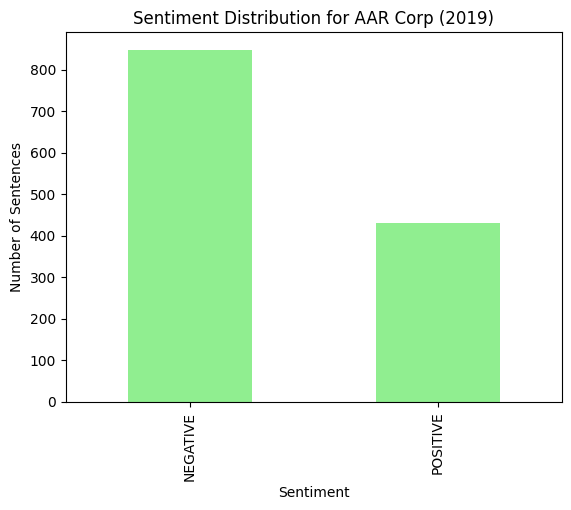

In [11]:
from transformers import pipeline

# Load a pre-trained sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis")

# Apply sentiment analysis to each sentence
filtered_data['sentiment'] = filtered_data['sentence'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

# Visualize the sentiment distribution
filtered_data['sentiment'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Sentiment Distribution for AAR Corp (2019)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Sentences')
plt.show()


Sample Data:
     cik                                           sentence  section  \
0  1750  ITEM 1. BUSINESS General AAR CORP. and its sub...        0   
1  1750  AAR was founded in 1951, organized in 1955 and...        0   
2  1750  We are a diversified provider of products and ...        0   
3  1750  Fiscal 2019 was a year focused on growth and e...        0   
4  1750  We succeeded in building customer relationship...        0   

                         labels  filingDate      name                 docID  \
0  {'1d': 0, '5d': 1, '30d': 0}  2019-07-18  AAR CORP  0000001750_10-K_2019   
1  {'1d': 0, '5d': 1, '30d': 0}  2019-07-18  AAR CORP  0000001750_10-K_2019   
2  {'1d': 0, '5d': 1, '30d': 0}  2019-07-18  AAR CORP  0000001750_10-K_2019   
3  {'1d': 0, '5d': 1, '30d': 0}  2019-07-18  AAR CORP  0000001750_10-K_2019   
4  {'1d': 0, '5d': 1, '30d': 0}  2019-07-18  AAR CORP  0000001750_10-K_2019   

                         sentenceID  sentenceCount  tickers exchanges  \
0  00000017

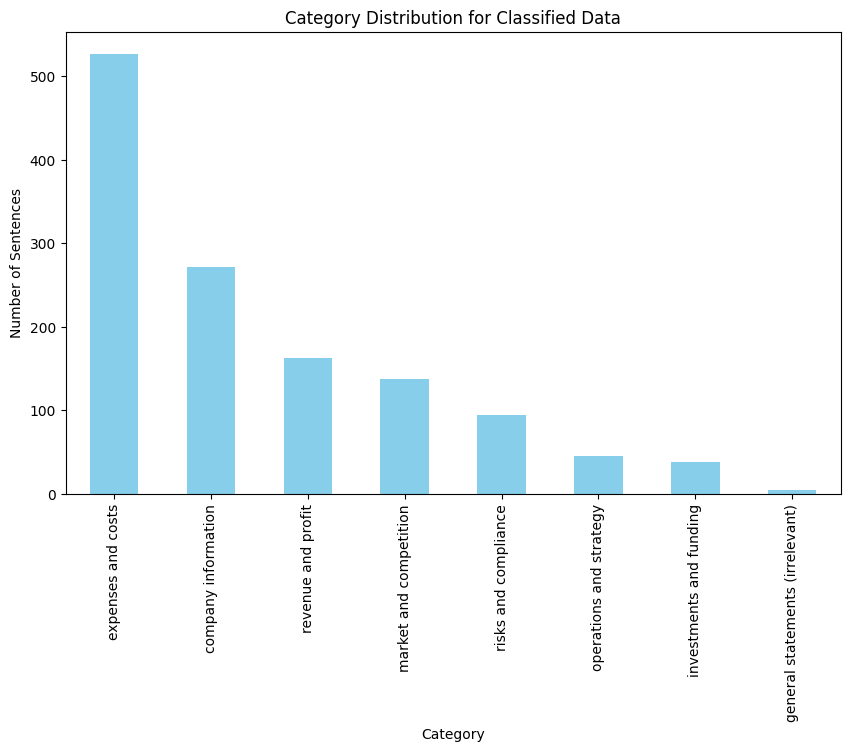


### Additional Insights ###
Unique Categories: 8
Top Category: expenses and costs with 527 sentences.
Least Frequent Category: general statements (irrelevant) with 4 sentences.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the classified data
classified_data = pd.read_csv('classified_data.csv')

#Display a few rows to understand the structure
print("Sample Data:\n", classified_data.head())

# Summary statistics for the categories
print("\n### Category Distribution Overview ###")
category_counts = classified_data['classification'].value_counts()
print("Total Categories Identified:", category_counts.sum())
print(category_counts)

# Plotting the category distribution
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Category Distribution for Classified Data')
plt.xlabel('Category')
plt.ylabel('Number of Sentences')
plt.show()

# Print additional context for further understanding
print("\n### Additional Insights ###")
print(f"Unique Categories: {classified_data['classification'].nunique()}")
print(f"Top Category: {category_counts.idxmax()} with {category_counts.max()} sentences.")
print(f"Least Frequent Category: {category_counts.idxmin()} with {category_counts.min()} sentences.")


/Users/prateekverma/opt/anaconda3/envs/pv_env2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sample Data:
     cik                                           sentence  section  \
0  1750  ITEM 1. BUSINESS General AAR CORP. and its sub...        0   
1  1750  AAR was founded in 1951, organized in 1955 and...        0   
2  1750  We are a diversified provider of products and ...        0   
3  1750  Fiscal 2019 was a year focused on growth and e...        0   
4  1750  We succeeded in building customer relationship...        0   

                         labels  filingDate      name                 docID  \
0  {'1d': 0, '5d': 1, '30d': 0}  2019-07-18  AAR CORP  0000001750_10-K_2019   
1  {'1d': 0, '5d': 1, '30d': 0}  2019-07-18  AAR CORP  0000001750_10-K_2019   
2  {'1d': 0, '5d': 1, '30d': 0}  2019-07-18  AAR CORP  0000001750_10-K_2019   
3  {'1d': 0, '5d': 1, '30d': 0}  2019-07-18  AAR CORP  0000001750_10-K_2019   
4  {'1d': 0, '5d': 1, '30d': 0}  2019-07-18  AAR CORP  0000001750_10-K_2019   

                         sentenceID  sentenceCount  tickers exchanges  \
0  00000017

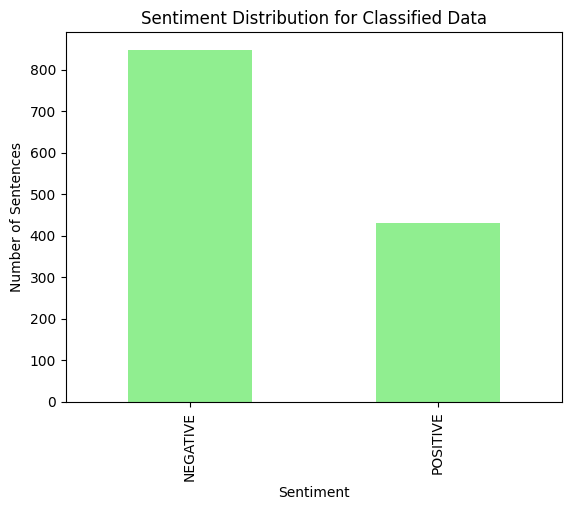

<Figure size 1200x800 with 0 Axes>

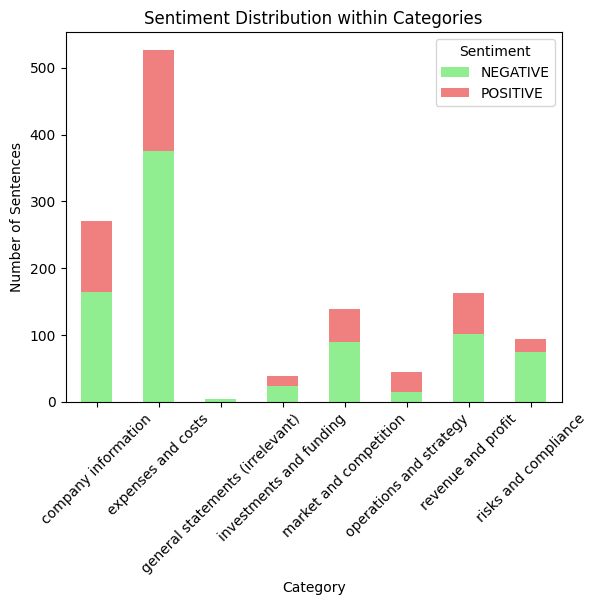


### Sentiment Breakdown by Category ###
sentiment                        NEGATIVE  POSITIVE
classification                                     
company information                 164.0     107.0
expenses and costs                  376.0     151.0
general statements (irrelevant)       4.0       0.0
investments and funding              23.0      15.0
market and competition               89.0      49.0
operations and strategy              15.0      30.0
revenue and profit                  102.0      60.0
risks and compliance                 75.0      19.0


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import pipeline

# Load the classified data from CSV
classified_data = pd.read_csv('classified_data.csv')

# Display a few rows to confirm the structure
print("Sample Data:\n", classified_data.head())

# Load a pre-trained sentiment analysis model
sentiment_analyzer = pipeline("sentiment-analysis")

# Apply sentiment analysis to each sentence
classified_data['sentiment'] = classified_data['sentence'].apply(lambda x: sentiment_analyzer(x)[0]['label'])

# Save the updated classified data (including sentiment) for future use
classified_data.to_csv('classified_data_with_sentiment.csv', index=False)

# Visualize the sentiment distribution
classified_data['sentiment'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Sentiment Distribution for Classified Data')
plt.xlabel('Sentiment')
plt.ylabel('Number of Sentences')
plt.show()

# Now you can proceed with the category and sentiment analysis:
category_sentiment = classified_data.groupby(['classification', 'sentiment']).size().unstack().fillna(0)

# Plot the sentiment distribution within each category
plt.figure(figsize=(12, 8))
category_sentiment.plot(kind='bar', stacked=True, color=['lightgreen', 'lightcoral'])
plt.title('Sentiment Distribution within Categories')
plt.xlabel('Category')
plt.ylabel('Number of Sentences')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

# Print additional insights
print("\n### Sentiment Breakdown by Category ###")
print(category_sentiment)


## Analysis on Evaluation data.

,Question,Answer,Complexity,Category,Prediction Vector,Outcome Vector,Answer Relevance Vector,Prediction KG,Outcome KG,Answer Relevance KG
0,When was AAR founded?,AAR was founded in 1951.,Moderate,General,AAR was founded in 1951.,1,High Relevance,More detailed response,1,High Relevance
1,What was the purpose of the INL/A Worldwide Av...,The purpose of the INL/A Worldwide Aviation Su...,Moderate,Operations & Services,"Related, but slightly off",0,Medium Relevance,The purpose of the INL/A Worldwide Aviation Su...,1,High Relevance
2,What is the scope of the contract mentioned in...,The contract is for globally operating and mai...,Simple,Contracts & Agreements,The contract is for globally operating and mai...,1,High Relevance,"Sorry, I don't know the answer",0,Low Relevance
3,What services does the company provide under t...,The company provides total supply chain manage...,Complex,Operations & Services,"Sorry, I don't know the answer",0,Low Relevance,The company provides total supply chain manage...,1,High Relevance
4,What type of aircraft does Force have in its f...,"C-130, KC-135, and E-3 aircraft.",Simple,Operations & Services,"C-130, KC-135, and E-3 aircraft.",1,High Relevance,"Sorry, I don't know the answer",0,Low Relevance


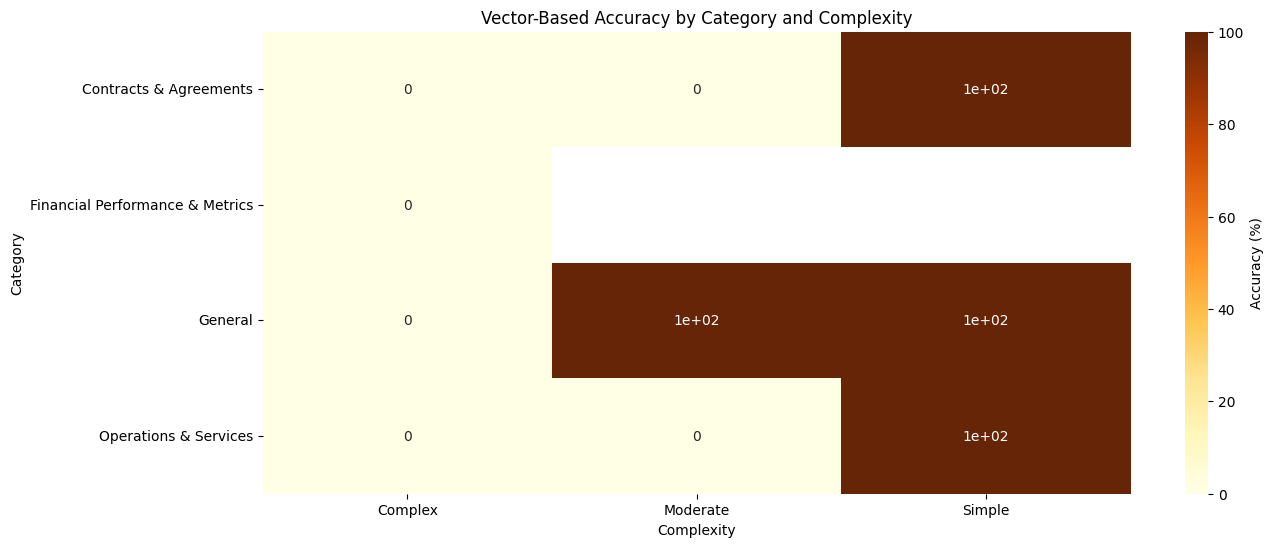

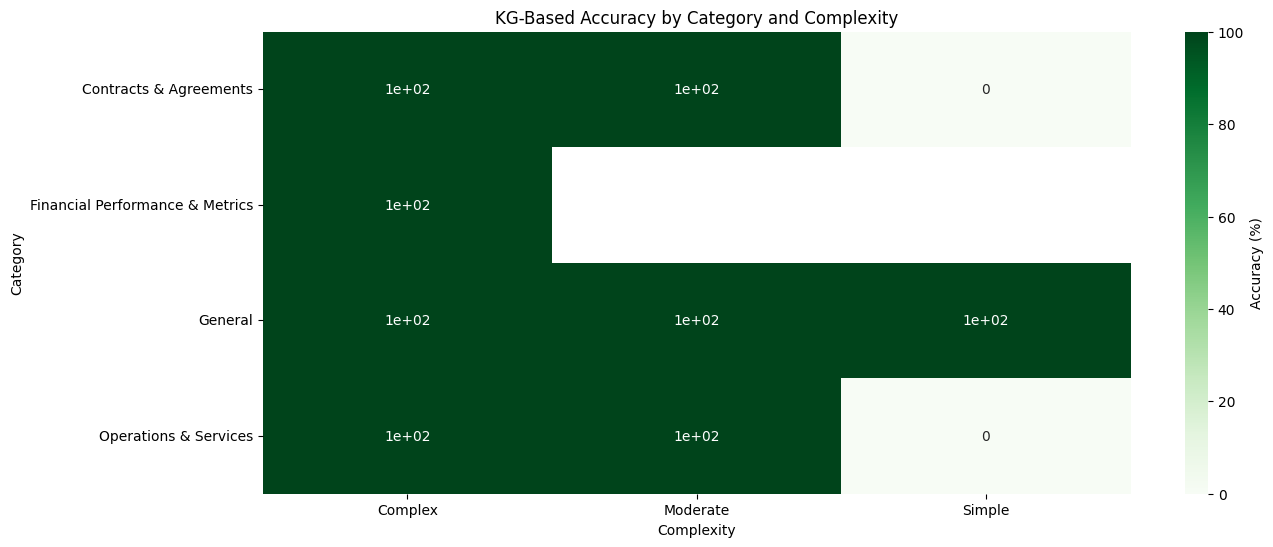

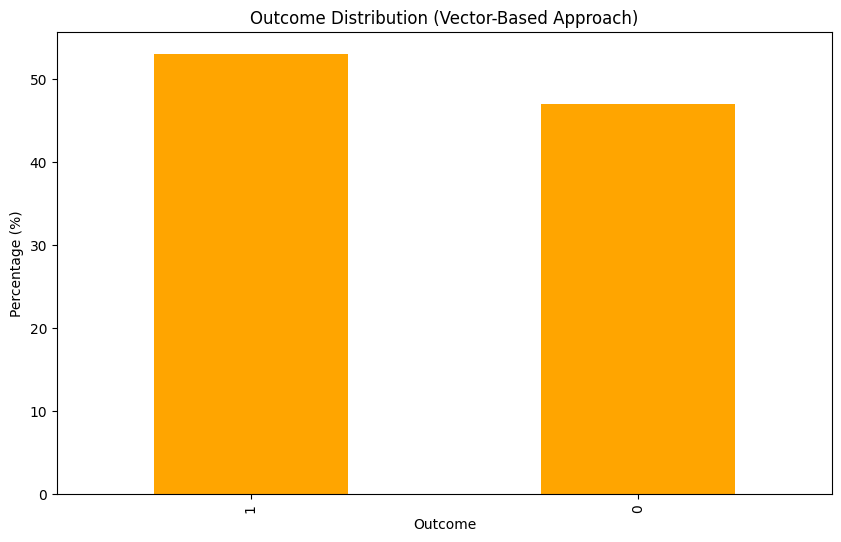

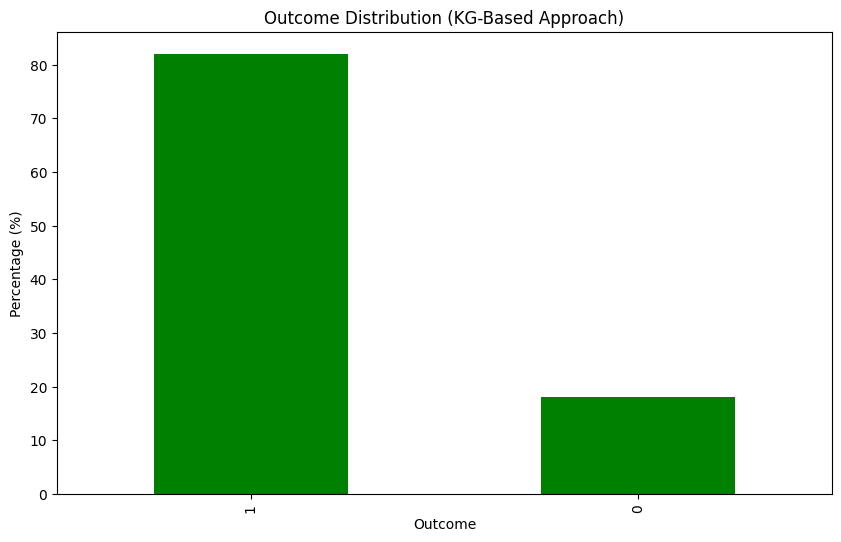

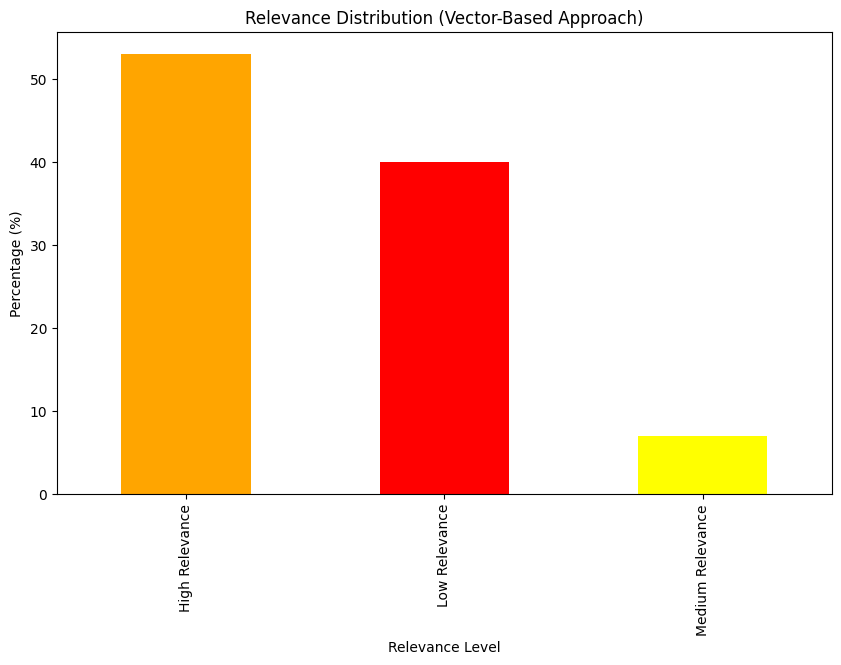

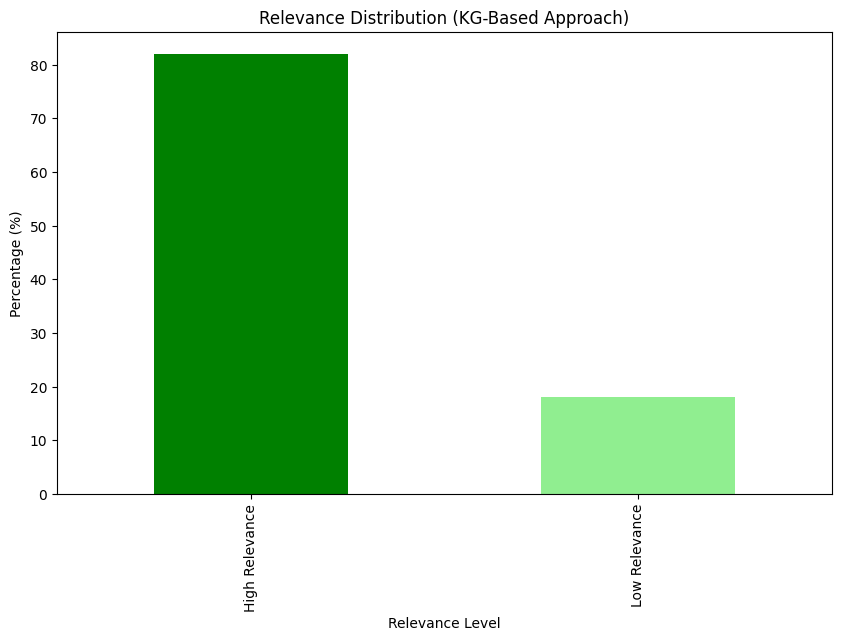

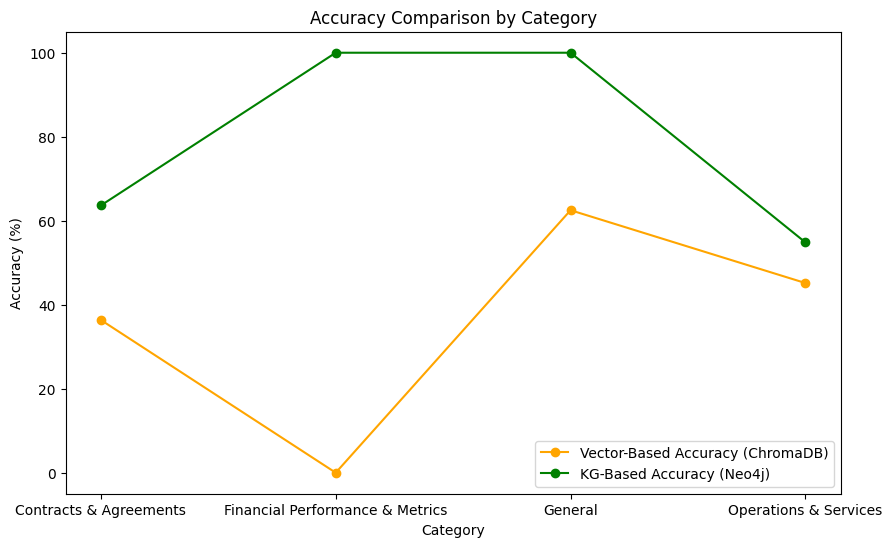

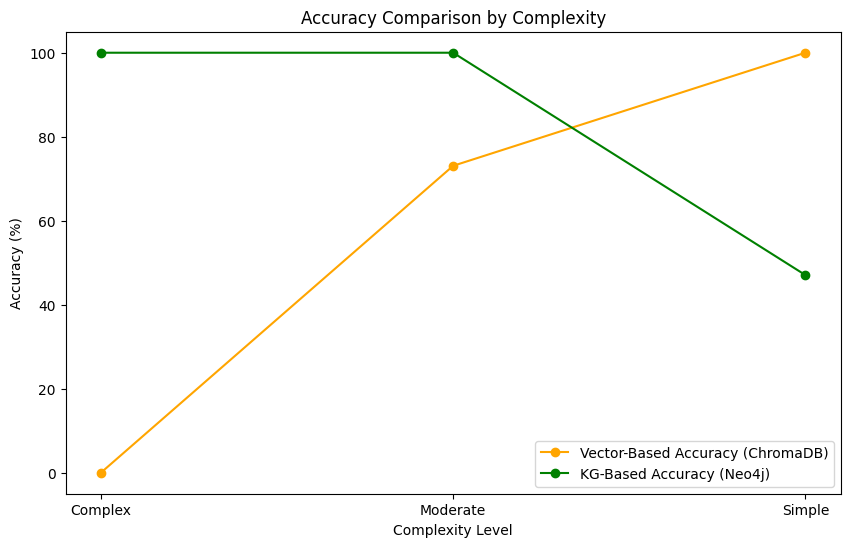

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'testOutcome.csv'
data = pd.read_csv(file_path)


display(data.head())


accuracy_by_category_complexity_vector = data.groupby(['Category', 'Complexity'])['Outcome Vector'].mean().unstack()

# Plot the Vector-based accuracy by Category and Complexity
plt.figure(figsize=(14, 6))
sns.heatmap(accuracy_by_category_complexity_vector * 100, annot=True, cmap='YlOrBr', cbar_kws={'label': 'Accuracy (%)'})
plt.title('Vector-Based Accuracy by Category and Complexity')
plt.ylabel('Category')
plt.xlabel('Complexity')
plt.show()

# Example: Calculate Accuracy by Category and Complexity for KG-based predictions
accuracy_by_category_complexity_kg = data.groupby(['Category', 'Complexity'])['Outcome KG'].mean().unstack()

# Plot the KG-based accuracy by Category and Complexity
plt.figure(figsize=(14, 6))
sns.heatmap(accuracy_by_category_complexity_kg * 100, annot=True, cmap='Greens', cbar_kws={'label': 'Accuracy (%)'})
plt.title('KG-Based Accuracy by Category and Complexity')
plt.ylabel('Category')
plt.xlabel('Complexity')
plt.show()

# Example: Outcome Distribution for Vector-based predictions
outcome_distribution_vector = data['Outcome Vector'].value_counts(normalize=True) * 100

# Plot Outcome Distribution for Vector-based approach
plt.figure(figsize=(10, 6))
outcome_distribution_vector.plot(kind='bar', color='orange')
plt.title('Outcome Distribution (Vector-Based Approach)')
plt.ylabel('Percentage (%)')
plt.xlabel('Outcome')
plt.show()

# Example: Outcome Distribution for KG-based predictions
outcome_distribution_kg = data['Outcome KG'].value_counts(normalize=True) * 100

# Plot Outcome Distribution for KG-based approach
plt.figure(figsize=(10, 6))
outcome_distribution_kg.plot(kind='bar', color='green')
plt.title('Outcome Distribution (KG-Based Approach)')
plt.ylabel('Percentage (%)')
plt.xlabel('Outcome')
plt.show()

# Relevance Distribution for Vector-based predictions
relevance_distribution_vector = data['Answer Relevance Vector'].value_counts(normalize=True) * 100

# Plot Relevance Distribution for Vector-based approach
plt.figure(figsize=(10, 6))
relevance_distribution_vector.plot(kind='bar', color=['orange', 'red', 'yellow'])
plt.title('Relevance Distribution (Vector-Based Approach)')
plt.ylabel('Percentage (%)')
plt.xlabel('Relevance Level')
plt.show()

# Relevance Distribution for KG-based predictions
relevance_distribution_kg = data['Answer Relevance KG'].value_counts(normalize=True) * 100

# Plot Relevance Distribution for KG-based approach
plt.figure(figsize=(10, 6))
relevance_distribution_kg.plot(kind='bar', color=['green', 'lightgreen'])
plt.title('Relevance Distribution (KG-Based Approach)')
plt.ylabel('Percentage (%)')
plt.xlabel('Relevance Level')
plt.show()

# Comparison of Accuracy by Category for both Vector and KG-based approaches
accuracy_by_category_vector = data.groupby('Category')['Outcome Vector'].mean() * 100
accuracy_by_category_kg = data.groupby('Category')['Outcome KG'].mean() * 100

# Plot Comparison by Category
plt.figure(figsize=(10, 6))
plt.plot(accuracy_by_category_vector.index, accuracy_by_category_vector, marker='o', label='Vector-Based Accuracy (ChromaDB)', color='orange')
plt.plot(accuracy_by_category_kg.index, accuracy_by_category_kg, marker='o', label='KG-Based Accuracy (Neo4j)', color='green')
plt.title('Accuracy Comparison by Category')
plt.ylabel('Accuracy (%)')
plt.xlabel('Category')
plt.legend()
plt.show()

# Comparison of Accuracy by Complexity for both Vector and KG-based approaches
accuracy_by_complexity_vector = data.groupby('Complexity')['Outcome Vector'].mean() * 100
accuracy_by_complexity_kg = data.groupby('Complexity')['Outcome KG'].mean() * 100

# Plot Comparison by Complexity
plt.figure(figsize=(10, 6))
plt.plot(accuracy_by_complexity_vector.index, accuracy_by_complexity_vector, marker='o', label='Vector-Based Accuracy (ChromaDB)', color='orange')
plt.plot(accuracy_by_complexity_kg.index, accuracy_by_complexity_kg, marker='o', label='KG-Based Accuracy (Neo4j)', color='green')
plt.title('Accuracy Comparison by Complexity')
plt.ylabel('Accuracy (%)')
plt.xlabel('Complexity Level')
plt.legend()
plt.show()
